<a href="https://colab.research.google.com/github/Mdrashid11/machine-learning/blob/main/naive_bayes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import nltk
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [5]:
# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
# Text preprocessing function
def clean_text(text):
    # Remove URLs, non-alphanumeric characters, and convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', str(text), flags=re.MULTILINE)
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [7]:
# Preprocessing the data
data['review_content'] = data['review_content'].apply(clean_text)

In [8]:
# Convert ratings to sentiment labels: Positive (4 and 5), Neutral (3), Negative (1 and 2)
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['sentiment'] = data['rating'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

# Drop rows with missing sentiment
data = data.dropna(subset=['sentiment', 'review_content'])

In [9]:
# Extract features and labels
X = data['review_content']
y = data['sentiment']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Convert text data to numerical data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize and train the Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

MultinomialNB()

In [12]:
# Make predictions
y_pred = nb_model.predict(X_test_vec)

In [13]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(0.7863636363636364,
 '              precision    recall  f1-score   support\n\n     neutral       0.86      0.21      0.34       114\n    positive       0.78      0.99      0.87       326\n\n    accuracy                           0.79       440\n   macro avg       0.82      0.60      0.61       440\nweighted avg       0.80      0.79      0.73       440\n')

<ipython-input-15-aa3190ba5fec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['sentiment'], palette='Set2')


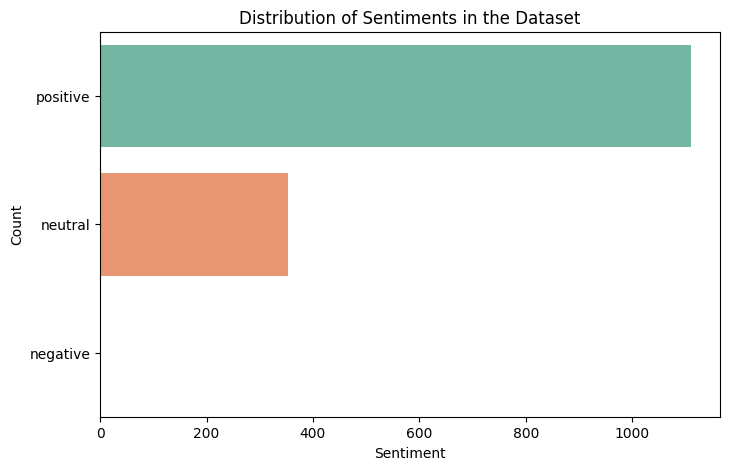

In [15]:
# Visualization 1: Sentiment Distribution in the Dataset
plt.figure(figsize=(8, 5))
sns.countplot(data['sentiment'], palette='Set2')
plt.title('Distribution of Sentiments in the Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

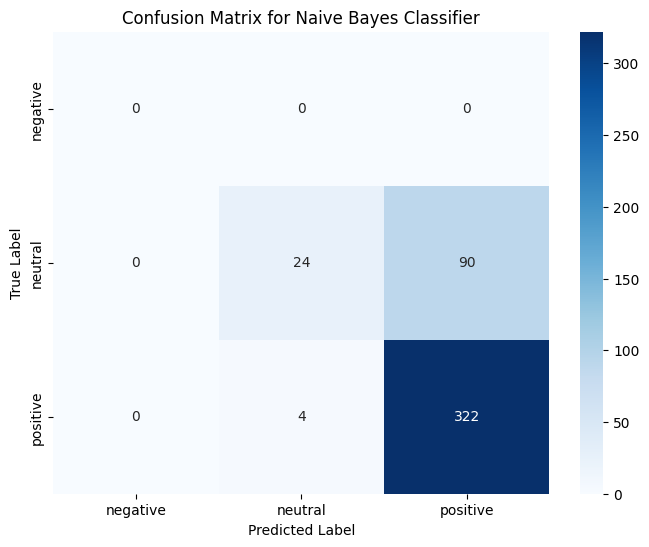

In [16]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['negative', 'neutral', 'positive'])

# Visualization 2: Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()